In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [36]:
data = pd.read_csv('Diabetes Classification.csv')

In [37]:
data_encoded = pd.get_dummies(data, columns=['Gender'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   object 
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


In [29]:
data.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [28]:
# удаление технический столбец
data = data.drop(columns=['Unnamed: 0'])

In [31]:
data['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [32]:
data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1, 'f': 1})

/tmp/ipython-input-1507084781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1, 'f': 1})


In [7]:
data.shape

(5132, 10)

In [8]:
data.describe()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,48.950312,0.365549,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,14.048794,0.481631,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,20.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,36.000000,0.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,49.000000,0.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,59.000000,1.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,93.000000,1.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


In [39]:
# X — признаки (все колонки кроме Diagnosis)
# y — целевая переменная (Diagnosis)
X = data_encoded.drop('Diagnosis', axis=1)
y = data_encoded['Diagnosis']

# Делим данные: 80% — обучение, 20% — тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (4105, 12)
Размер тестовой выборки: (1027, 12)


In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest — Accuracy: {accuracy_rf:.4f}")


Random Forest — Accuracy: 0.9971


In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       423

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027



In [42]:
encoded_data = pd.get_dummies(data)

In [43]:
correlations = encoded_data.corr()

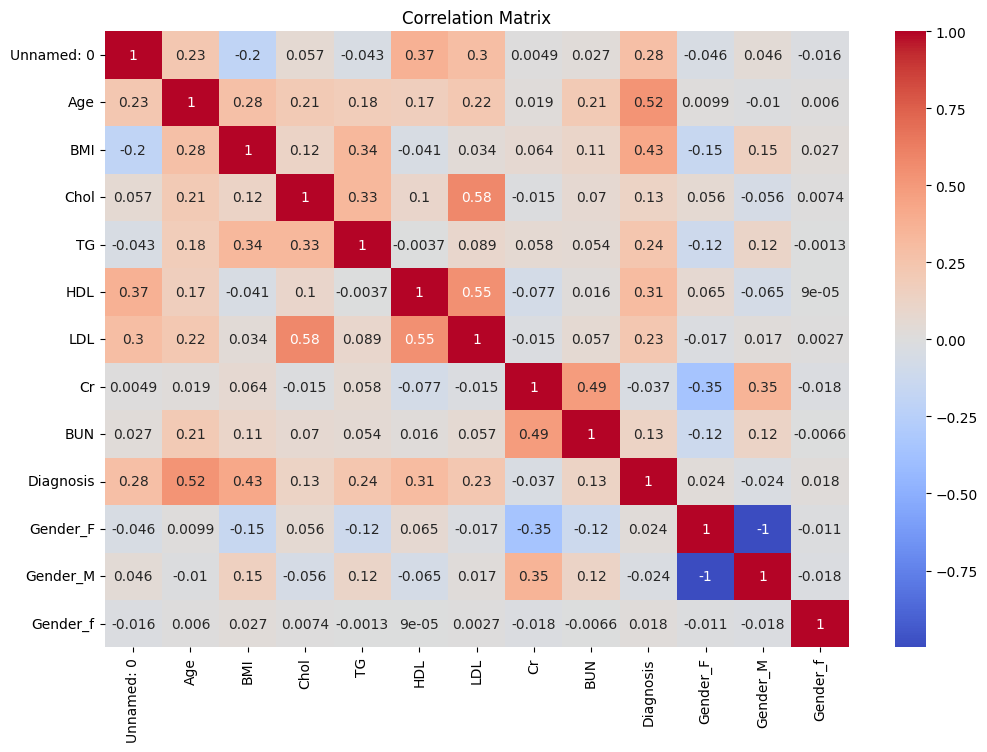

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [45]:
X = data_encoded.drop('Diagnosis', axis=1)
y = data_encoded['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

best_model_name = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

    print(f"{name} - Accuracy: {accuracy}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.7896786757546251
Random Forest - Accuracy: 0.9980525803310614
Support Vector Machine - Accuracy: 0.9513145082765336


In [46]:
 print(f"\nBest Model: {best_model_name} - Accuracy: {best_accuracy}")


Best Model: Random Forest - Accuracy: 0.9980525803310614


In [48]:
import numpy as np

# Введи значения вручную (пример)
# Возраст, Пол, Индекс массы тела (ИМТ), Холестерин, ТГ (триглицериды), ЛПВП (липопротеины высокой плотности), ЛПНП (липопротеины низкой плотности), Cr (креатинин), Азот мочевины в крови (АМК)
new_data = np.array([[50, 1, 24, 4.2, 0.9, 2.4, 1.4, 46.0, 4.7, 12, 0.3, 1.3]])

# Предсказание
prediction = rf.predict(new_data)

print("Предсказание:", prediction)

Предсказание: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import joblib

model = joblib.load('rf.pkl')

X_new = [[50, 1, 24, 4.2, 0.9, 2.4, 1.4, 46.0, 4.7]]
y_pred = model.predict(X_new)

print(y_pred)


[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


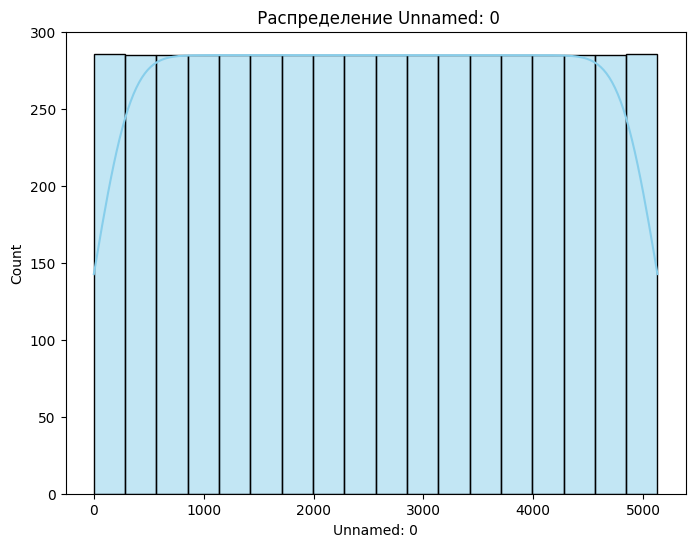

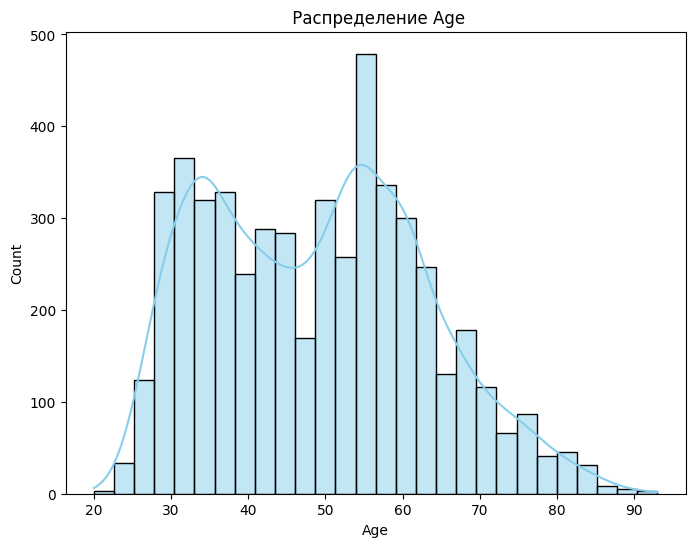

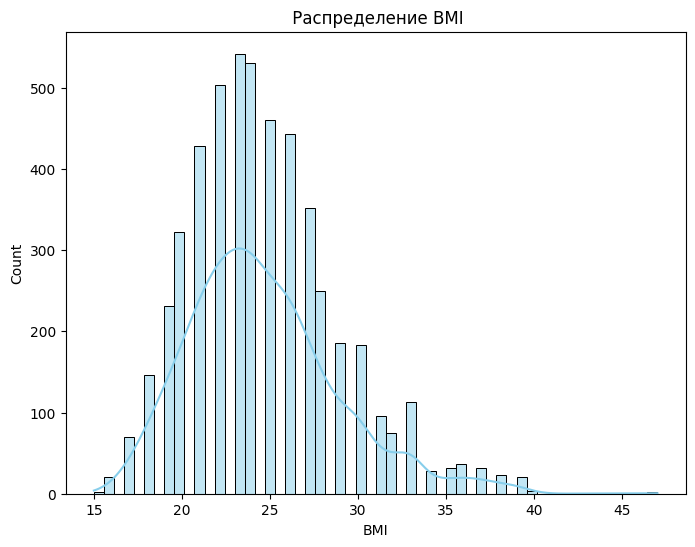

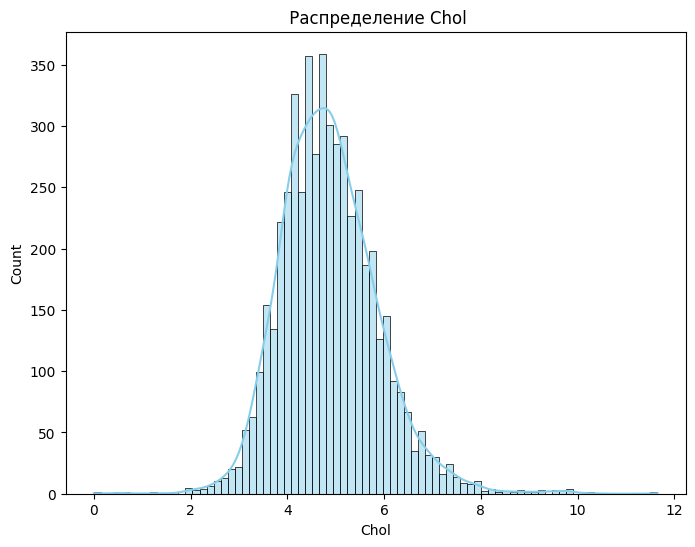

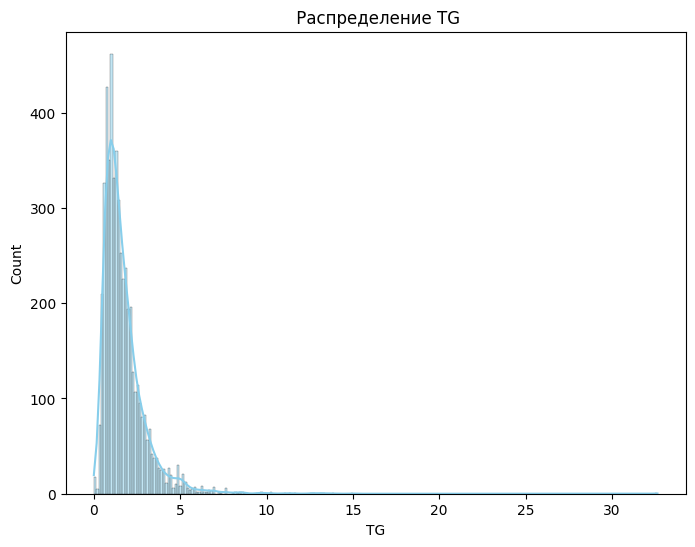

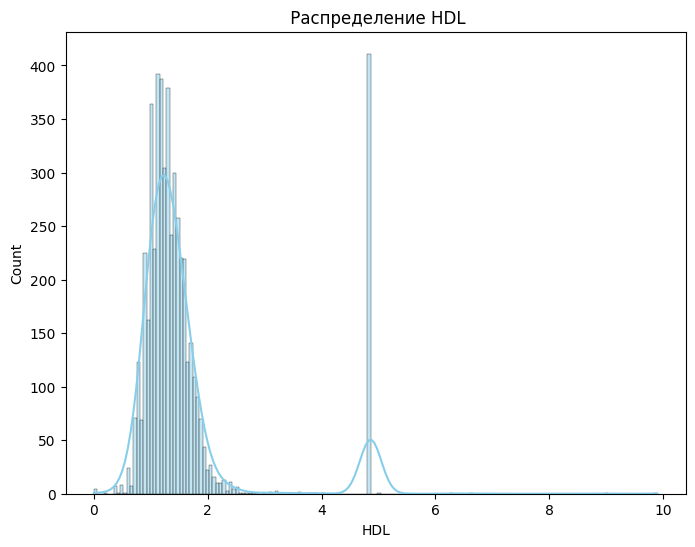

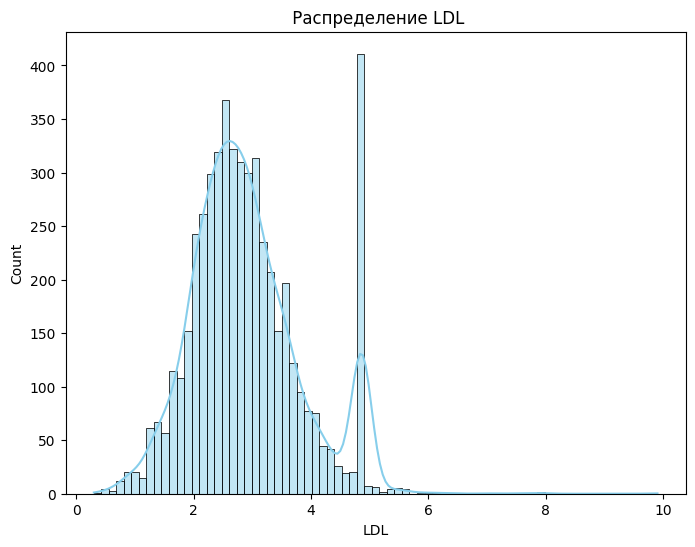

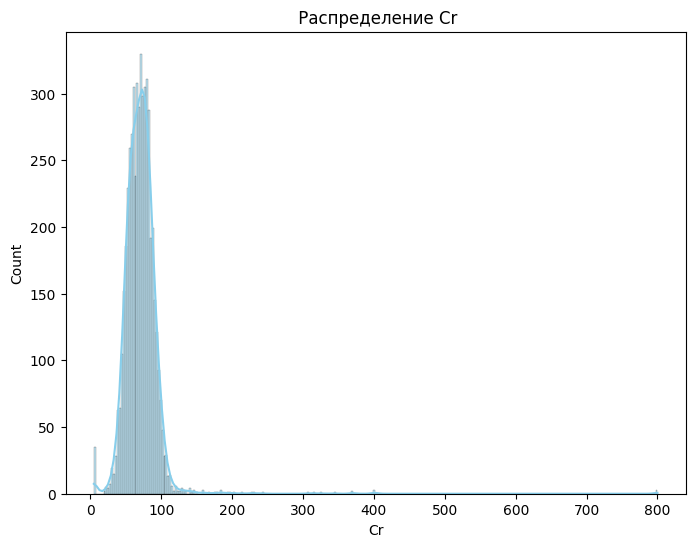

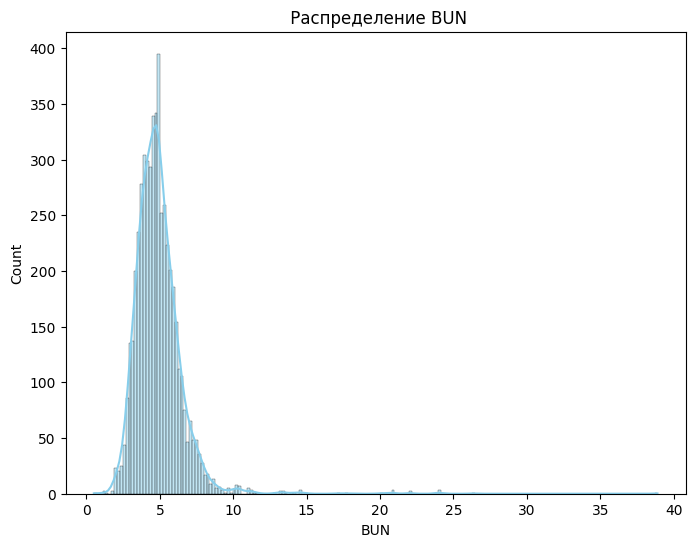

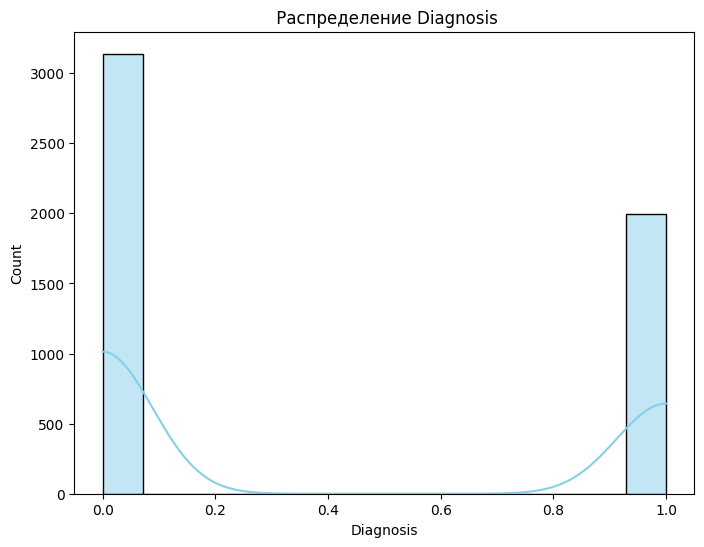

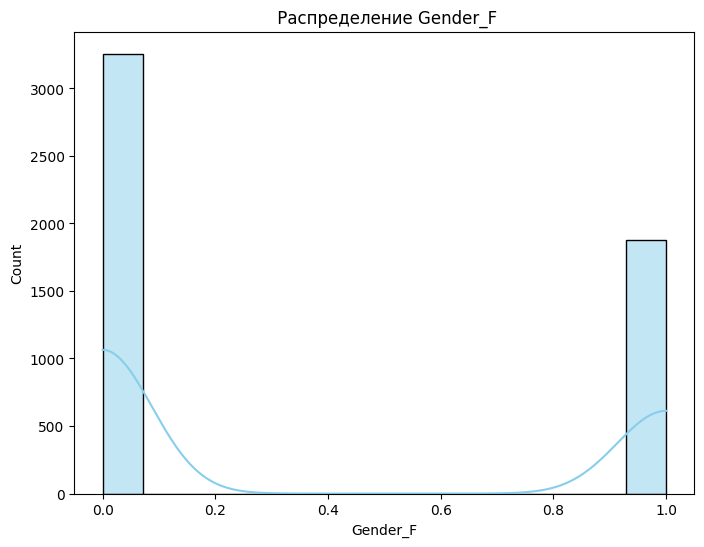

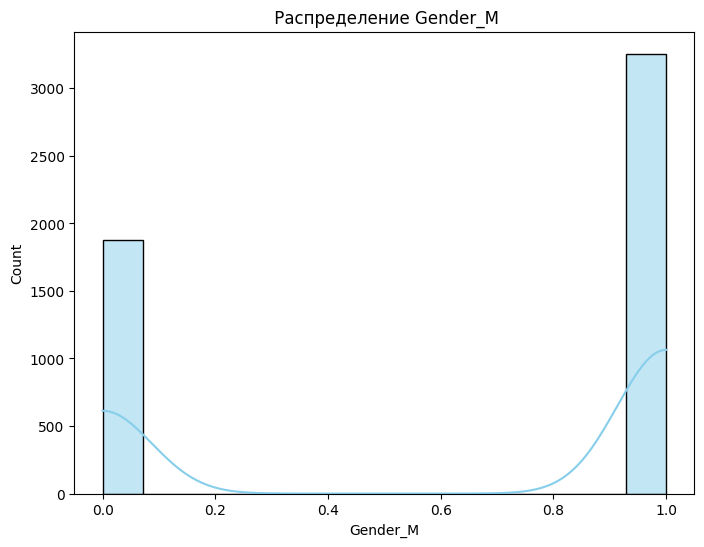

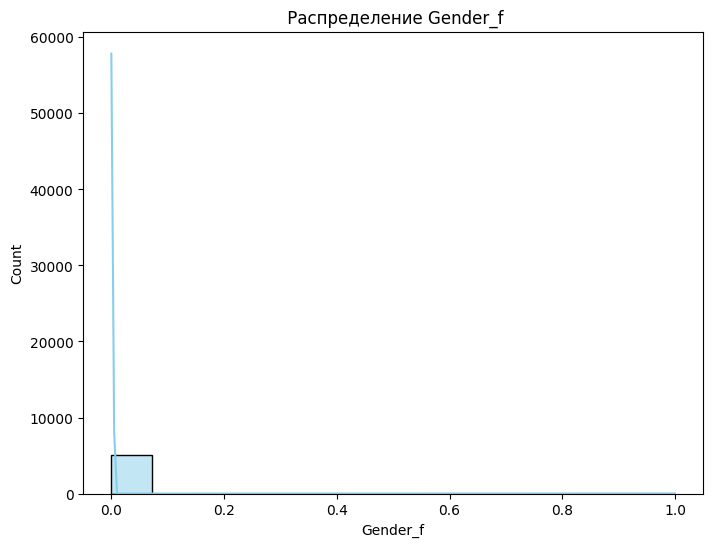

In [50]:
for column in data_encoded.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_encoded[column], kde=True, color='skyblue')
    plt.title(' Распределение {}'.format(column))
    plt.show()

In [19]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 